In [4]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE_URL = os.getenv("DATABASE_URL")  

In [8]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine(DATABASE_URL)

In [10]:
df = pd.read_sql("SELECT * FROM monitoring.feedback_users;", engine)
df.head()


,id,image_path,timestamp,feedback,prediction,time_metric_id
0,1,/app/src/data/images/positif/chien/20250926094...,2025-09-26 09:41:25.016807,1,d,1
1,2,/app/src/data/images/positif/chien/20250926094...,2025-09-26 09:42:51.149015,1,d,2
2,3,/app/src/data/images/positif/chien/20250926094...,2025-09-26 09:43:48.370929,1,d,3
3,4,/app/src/data/images/positif/chat/202509260944...,2025-09-26 09:44:20.209514,1,c,4
4,5,/app/src/data/images/positif/chat/202509260945...,2025-09-26 09:45:53.234615,1,c,5


In [11]:
df["feedback"].mean()

np.float64(0.7777777777777778)

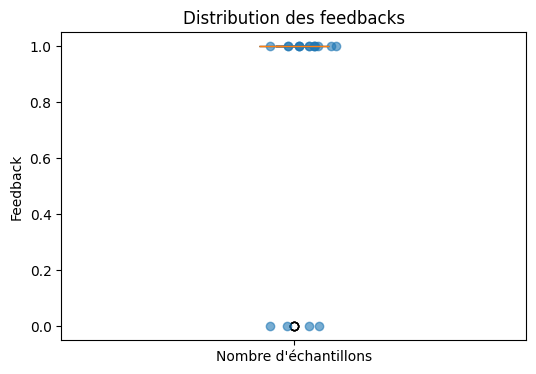

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))

# Boîte à moustache
plt.boxplot(df["feedback"], vert=True, patch_artist=True)

# Points individuels (jitter horizontal pour éviter la superposition)
x = np.random.normal(1, 0.04, size=len(df["feedback"]))
plt.plot(x, df["feedback"], 'o', alpha=0.6)

plt.title("Distribution des feedbacks")
plt.ylabel("Feedback")
plt.xticks([1], ["Nombre d'échantillons"])
plt.show()


In [12]:
df2 = pd.read_sql("SELECT * FROM monitoring.time_metrics;", engine)
df2.head()


,id,timestamp,inference_time_ms,success
0,1,2025-09-26 09:41:21.928489,196.526979,True
1,2,2025-09-26 09:42:49.433149,55.585991,True
2,3,2025-09-26 09:43:46.936166,249.305530,True
3,4,2025-09-26 09:44:17.712644,62.515938,True
4,5,2025-09-26 09:45:51.381364,60.594836,True


In [13]:
df2["inference_time_ms"].mean()

np.float64(82.15086050020344)

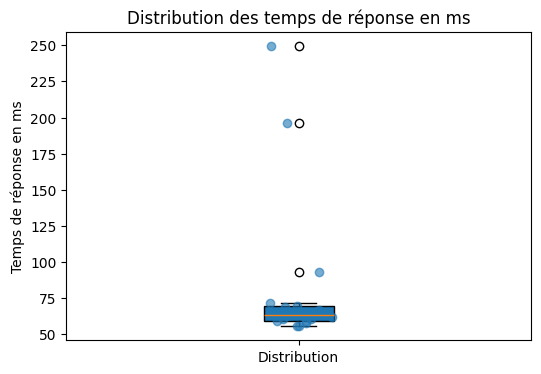

In [17]:
plt.figure(figsize=(6, 4))

# Boîte à moustache
plt.boxplot(df2["inference_time_ms"], vert=True, patch_artist=True)

# Points individuels (jitter horizontal pour éviter la superposition)
x = np.random.normal(1, 0.04, size=len(df2["inference_time_ms"]))
plt.plot(x, df2["inference_time_ms"], 'o', alpha=0.6)

plt.title("Distribution des temps de réponse en ms")
plt.ylabel("Temps de réponse en ms")
plt.xticks([1], ["Distribution"])
plt.show()
